In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from konlpy.tag import Hannanum
from konlpy.tag import Okt
from konlpy.tag import Komoran
import sqlite3 as sq3
from pandas.io import sql
import os
import numpy as np
import math

## read db file

In [15]:
# 데이터베이스 저장
def db_save(data, db_name, table_name):
    with sq3.connect(os.path.join('.',db_name)) as con: # sqlite DB 파일이 존재하지 않는 경우 파일생성
        try:
            data.to_sql(name = table_name, con = con, index = False, if_exists='replace') 
            #if_exists : {'fail', 'replace', 'append'} default : fail
        except Exception as e:
            print(str(e))
        print(len(data), '건 저장완료..')

In [16]:
# 데이터베이스 불러오기
def db_select(db_name, table_name):
    with sq3.connect(db_name) as con: 
        try:
            query = 'SELECT * FROM {}'.format(table_name)
            df = pd.read_sql(query, con = con)
        except Exception as e:
            print(str(e)) 
        return df  

In [17]:
# 데이터베이스 삭제
def db_delete(db_name, table_name):
    with sq3.connect(db_name) as con: 
        try:
            cur = con.cursor()
            sql = 'DELETE FROM {}'.format(table_name)
            cur.execute(sql)
        except Exception as e:
            print(str(e))

In [18]:
def word_tokens(string):

    tokens_const = []

    for i in string.split(','):
        tokens_const.append(i)

    # 단어별 빈도를 담을 딕셔너리 생성하고, 빈도 계산
    const_word_count = dict()
    for word in tokens_const:
        const_word_count[word] = const_word_count.get(word, 0) + 1

    # 빈도를 key로 하여 단어를 빈도 역순으로 정렬
    sorted_word_count = sorted(const_word_count, key=const_word_count.get, reverse=True)

    n = sorted_word_count[:] # 빈도수 상위 20개의 단어를 추출
    w = [const_word_count[key] for key in n] # 20개 단어에 대한 빈도
    
    #n = sorted_word_count[:20] # 빈도수 상위 20개의 단어를 추출
    #w = [const_word_count[key] for key in n] # 20개 단어에 대한 빈도

    full_list = []

    for i in n,w:
        full_list.append(i)

    return full_list

# save word tokens into a file

In [19]:
DB_NAME = '신흥지역정보_종합지식포탈.db'
TABLE_NAME = 'emerics_tokenized'
df = db_select(DB_NAME,TABLE_NAME)

In [20]:
temp_df = df.copy()

strings_t = []
strings_c = []

for i in temp_df.iloc[:,5]:
    string_token = ""
    string_count = ""
    
    token_set = word_tokens(i)
    string_token = ",".join(token_set[0])
    
    n = map(str,token_set[1])
    n = list(n)
    string_count = ",".join(n)

    strings_t.append(string_token)
    strings_c.append(string_count)
    
temp_df['tokens'] = strings_t
temp_df['counts'] = strings_c

temp_df.iloc[:,[0,6,7]]

,제목,tokens,counts
0,"[이슈트렌드] 디폴트 선언했던 잠비아, IMF 구제금융 확보 성공","잠비아,부채,구제금융,정부,재정,중국,규모,달러한화,프로젝트,도입,지출,강조,대통령...","36,19,13,11,11,11,10,9,9,5,5,5,5,5,5,5,4,4,4,4..."
1,[이슈트렌드] 미국·유럽과 이란 사이 좁혀지지 않는 입장 차이로 난항에 빠진 핵 협상,"이란,협상,타결,미국,유럽,비판,서방,대변인,핵시설,사찰,국가,농축,우라늄,지적,요...","30,24,16,13,8,7,7,7,6,6,6,6,6,5,5,5,5,5,5,4,4,..."
2,"[이슈트렌드] 장기화되는 리비아 정치 위기, 유가 인상 자극 우려","리비아,총리,드베이바,의회,지명자,바샤,원유,정부,트리폴리,정치,장기화,내전,동부,...","27,25,15,14,11,10,9,7,7,6,6,6,6,6,6,5,5,5,5,5,..."
3,"[이슈트렌드] 이라크, 반외세 지도자의 은퇴 선언 이후 정치적 혼란 격화","이라크,알사드르,정치,내각,의회,친이란,시아파,촉구,지지자들,총선,선언,정부,사태,...","21,21,14,9,8,8,7,7,7,6,5,5,5,5,5,4,4,4,4,4,4,4..."
4,"[이슈트렌드] 남아프리카공화국, 인플레이션에 따른 경제난과 사회적 위기 심화","남아공,인플레이션,연료비,정부,상승,인상,가격,기준금리,파업,노조,수준,저소득층,남...","18,14,12,11,10,10,10,7,6,5,5,4,3,3,3,3,3,3,3,3..."
...,...,...,...
1616,밀로쉬 제만 대통령 재선 성공,"대통령,체코,대선,결선투표,결과,밀로쉬,제만Milo,승리,러시아,중국,우호적,입장,...","3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1"
1617,유럽의 암호화폐 정책대응 상황,"암호화폐,검토,유럽,시장,지역,대비,저조한,현행,통화정책,위협,별도,대응,분산원장기...","3,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,..."
1618,기후변화와 북극지역 관련 쟁점,"북극해,북극지역,얼음,면적,해빙解氷,자원,기록,사이,해빙,지역,관심,러시아,미국,중...","13,5,4,4,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1..."
1619,바이오연료(biofuel)의 상업성과 지속가능성,"바이오연료,생산,화석연료,에너지,사용,증가,배출,가격,상업성,식량,달성,연료,작황,...","14,9,4,4,4,4,3,3,3,2,2,2,2,2,2,2,2,2,2,1,1,1,1..."


In [21]:
db_save(temp_df, DB_NAME, 'emerics_tokenized2')
#db_save_as_csv(temp_df)

1621 건 저장완료..


In [22]:
df1 = db_select(DB_NAME, 'emerics_tokenized2')
df1 = df1.iloc[:,[0,5]].copy()
df1

,제목,BoW
0,"[이슈트렌드] 디폴트 선언했던 잠비아, IMF 구제금융 확보 성공","국제통화기금MF,잠비아,구제금융,지원,팬데믹,처음,디폴트,선언,잠비아,구제금융,도입..."
1,[이슈트렌드] 미국·유럽과 이란 사이 좁혀지지 않는 입장 차이로 난항에 빠진 핵 협상,"미국유럽,협상,교착,상태,상대,비판,대립,심화,미국,유럽,이란,태도,협상,타결,걸림..."
2,"[이슈트렌드] 장기화되는 리비아 정치 위기, 유가 인상 자극 우려","리비,정치,중앙정부,의회,첨예한,입장,차이,장기화,리비아,중앙정부,의회,상대,권력,..."
3,"[이슈트렌드] 이라크, 반외세 지도자의 은퇴 선언 이후 정치적 혼란 격화","의회,해산,요구,이라크,지도,정계,은퇴,선언,이라크,시아파,지도,은퇴,선언,이라크,..."
4,"[이슈트렌드] 남아프리카공화국, 인플레이션에 따른 경제난과 사회적 위기 심화","남아프리카공화국,최악,인플레이션,직면,남아공,인플레이션,최고치,기록,남아공,통계청,..."
...,...,...
1616,밀로쉬 제만 대통령 재선 성공,"체코,대선,결선투표,결과,밀로쉬,제만Milo,대통령,승리,대통령,러시아,중국,우호적..."
1617,유럽의 암호화폐 정책대응 상황,"유럽,암호화폐,시장,지역,대비,저조한,현행,암호화폐,통화정책,위협,별도,대응,분산원..."
1618,기후변화와 북극지역 관련 쟁점,"미국국립빙설자료센터NSDC,북극해,얼음,면적,기록,위성,북극해,관찰,시작,종전,최저..."
1619,바이오연료(biofuel)의 상업성과 지속가능성,"각국,정부,화석연료,탄소,배출,안정적,에너지,확보,가능,바이오연료,육성,바이오연료,..."


# 단어의 총 등장 횟수 구하기 --> TF

In [23]:
total_t = dict()

for i in df.iloc[:,5]:
    tokens_const = []
    
    for j in i.split(','):
        tokens_const.append(j)
    
    for each_t in tokens_const:
        if each_t in total_t.keys():
            total_t[each_t] += 1
        else :
            total_t[each_t] = 1

In [24]:
total_t_list = sorted(total_t.items(), key=lambda x:x[1], reverse=True)
TF = dict(total_t_list)
TF

{'정부': 8897,
 '대통령': 7476,
 '러시아': 4772,
 '경제': 4764,
 '터키': 3689,
 '미국': 3404,
 '총리': 2654,
 '기록': 2306,
 '장관': 2145,
 '지역': 2106,
 '한편': 1990,
 '상황': 1960,
 '지원': 1948,
 '폴란드': 1718,
 '전망': 1686,
 '헝가리': 1669,
 '교수': 1611,
 '브라질': 1611,
 '중국': 1608,
 '참고자료': 1571,
 '백신': 1552,
 '정책': 1538,
 '기업': 1537,
 '조치': 1497,
 '국가': 1489,
 '베네수엘라': 1467,
 '이스라엘': 1467,
 '계획': 1456,
 '우크라': 1454,
 '선거': 1443,
 '감수': 1432,
 '주장': 1415,
 '대비': 1393,
 '사우디': 1392,
 '감소': 1382,
 '수입': 1361,
 '규모': 1359,
 '수출': 1338,
 '인플레이션': 1328,
 '상승': 1261,
 '달러한화': 1259,
 '증가': 1255,
 '재정': 1238,
 '에너지': 1227,
 '협력': 1226,
 '제재': 1220,
 '가격': 1211,
 '이란': 1174,
 '관계': 1172,
 '시작': 1164,
 '대통령의': 1148,
 '인상': 1147,
 '국민': 1118,
 '원유': 1117,
 '우즈베키스탄': 1113,
 '벨라루스': 1096,
 '중앙은행': 1086,
 '성장': 1070,
 '강화': 1067,
 '산업': 1039,
 '의회': 1038,
 '시위': 1033,
 '대응': 1024,
 '요구': 1024,
 '중단': 996,
 '수준': 996,
 '카자흐스탄': 995,
 '체코': 990,
 '비판': 988,
 '유럽': 986,
 '남아공': 977,
 '기준': 972,
 '강조': 957,
 '언급': 947,
 '진행': 941,
 '

In [25]:
# using loop to iterate keys of dictionary
#new_dict = {}
#for key in orderdict:
#    if not (isinstance(orderdict[key], int) and orderdict[key] > 100):
#        new_dict[key] = orderdict[key]
#new_dict

## 특정 단어를 포함하는 문서빈도 수 계산 - DF

In [26]:
df = db_select(DB_NAME,'emerics_tokenized2')

In [27]:
wordUsage = dict()     # IDF

for key in TF:
    exis = 0
    for eachRow in df1.iloc[:,1]:
        tokens_const = []
        
        for j in eachRow.split(','):
            tokens_const.append(j)

        if (str(key) in tokens_const):
            exis += 1
            
    wordUsage[key] = exis

In [28]:
wordUsage_list = sorted(wordUsage.items(), key=lambda x:x[1], reverse=True)
DF = dict(wordUsage_list)
DF

{'참고자료': 1558,
 '교수': 1428,
 '감수': 1423,
 '정부': 1373,
 '한편': 1092,
 '대통령': 1085,
 '경제': 978,
 '상황': 909,
 '한국외국어대학교': 886,
 '장관': 739,
 '주장': 706,
 '지역': 690,
 '정보': 687,
 '미국': 683,
 '기록': 679,
 '국가': 678,
 '전망': 673,
 '시작': 667,
 '정책': 649,
 '지원': 646,
 '계획': 638,
 '규모': 604,
 '강조': 585,
 '진행': 563,
 '언급': 561,
 '조치': 553,
 '수준': 550,
 '국민': 536,
 '기업': 522,
 '러시아': 518,
 '제기': 516,
 '대응': 509,
 '요구': 506,
 '평가': 505,
 '증가': 500,
 '설명': 496,
 '우려': 492,
 '가운데': 487,
 '비판': 486,
 '감소': 484,
 '지적': 481,
 '대비': 478,
 '총리': 476,
 '강화': 475,
 '기준': 472,
 '추진': 465,
 '가능성': 463,
 '대통령의': 456,
 '최대': 442,
 '결과': 440,
 '전체': 438,
 '중단': 434,
 '사이': 432,
 '수입': 423,
 '관계': 418,
 '입장': 418,
 '국내': 417,
 '세계': 412,
 '경제적': 411,
 '달러한화': 410,
 '시장': 406,
 '해결': 401,
 '전문가들': 398,
 '수출': 397,
 '국제': 396,
 '국가들': 392,
 '협력': 387,
 '성장': 387,
 '상승': 381,
 '사용': 378,
 '유럽': 373,
 '비난': 372,
 '정치적': 369,
 '노력': 365,
 '산업': 363,
 '표명': 363,
 '확보': 362,
 '회복': 358,
 '불구': 355,
 '활동': 354,
 '비롯': 351,
 

### drop keys where the word does not have a significant meaning

In [29]:
# using loop to iterate keys of dictionary
#new_dict2 = {}
#for key in wordUsage_ordered3:
    #if not (isinstance(wordUsage_ordered3[key], int) and wordUsage_ordered3[key] > 1):
#    if not (wordUsage_ordered3[key] > 1):
#        new_dict2[key] = wordUsage_ordered3[key]
#new_dict2

# TF-IDF
##### 참고: https://brunch.co.kr/@bflysoft1117/127, https://www.researchgate.net/publication/342833072_gujojeog_topig_modelling-eul_hwal-yonghan_gong-gongdeiteo_suyo_bunseog_Analysis_of_Open_Government_Data_Demand_Using_Structural_Topic_Modeling
높을수록 단어 중요도가 높다
### TF-IDF = TF X log(N/DF)
- TF: 문서 내 특정 단어의 빈도 수
- N: 분석 대상 문서 통합
- DF: 특정 단어를 포함하는 문서빈도 수

In [31]:
TF_IDF = dict()     # dictionary to save TF-IDF values

N = len(df1)
for eachkey in list(TF.keys()):
    TF_temp = TF[eachkey]
    DF_temp = DF[eachkey]
    TF_IDF_each = TF_temp*math.log(N/DF_temp)
    TF_IDF[eachkey] = TF_IDF_each

temp_tf_idf = sorted(TF_IDF.items(), key=lambda x:x[1], reverse=True)
TF_IDF = dict(temp_tf_idf)
TF_IDF

{'터키': 7077.449231508839,
 '러시아': 5444.008689660393,
 '헝가리': 4475.036826786558,
 '폴란드': 4321.802859082313,
 '베네수엘라': 3794.8025587625493,
 '백신': 3779.0757123366125,
 '이스라엘': 3735.8789755514836,
 '사우디': 3732.325502029292,
 '브라질': 3522.9216456354566,
 '벨라루스': 3283.998906301308,
 '총리': 3252.1602915562953,
 '우즈베키스탄': 3193.2080684362254,
 '남아공': 3098.3511277786997,
 '체코': 3029.4645296348517,
 '대통령': 3001.339300070105,
 '우크라': 2978.467048246838,
 '미국': 2942.089666009272,
 '나이지리아': 2935.1996127012367,
 '조지아': 2886.611947524307,
 '인플레이션': 2839.9613244190537,
 '중국': 2756.18390890357,
 '루마니아': 2702.0375552197715,
 '이란': 2606.6492543428935,
 '카자흐스탄': 2573.8435896174074,
 '이집트': 2566.6627276670133,
 '선거': 2533.9208694913536,
 '멕시코': 2488.7721351987475,
 '시리아': 2471.877176657538,
 '경제': 2407.1960895028906,
 '세르비아': 2333.8894033356114,
 '원유': 2272.2150799701126,
 '칠레': 2251.727900812792,
 '키르기스스탄': 2234.9123512821866,
 '아르메니아': 2181.274183842646,
 '불가리아': 2153.1613067745598,
 '제재': 2137.981499930355,

### Save dictionaries

In [32]:
import pickle

In [33]:
def saveDict(my_dict, file_name):
    with open(file_name, "wb") as tf:
        pickle.dump(my_dict,tf)
    print(len(my_dict),' saved to file...')

In [42]:
def readDict(file_name):
    new_dict = dict()
    with open(file_name, "rb") as tf:
        new_dict = pickle.load(tf)
    return(new_dict)

In [44]:
saveDict(TF,'TF_file.pkl')
saveDict(DF,'DF_file.pkl')
saveDict(TF_IDF,'TF-IDF_file.pkl')

40228  saved to file...
40228  saved to file...
40228  saved to file...


In [46]:
#TF_new = readDict('TF_file.pkl')
#DF_new = readDict('DF_file.pkl')
TF_IDF_new = readDict('TF-IDF_file.pkl')
#print(TF_new)
#print(DF_new)
print(TF_IDF_new)

{'터키': 7077.449231508839, '러시아': 5444.008689660393, '헝가리': 4475.036826786558, '폴란드': 4321.802859082313, '베네수엘라': 3794.8025587625493, '백신': 3779.0757123366125, '이스라엘': 3735.8789755514836, '사우디': 3732.325502029292, '브라질': 3522.9216456354566, '벨라루스': 3283.998906301308, '총리': 3252.1602915562953, '우즈베키스탄': 3193.2080684362254, '남아공': 3098.3511277786997, '체코': 3029.4645296348517, '대통령': 3001.339300070105, '우크라': 2978.467048246838, '미국': 2942.089666009272, '나이지리아': 2935.1996127012367, '조지아': 2886.611947524307, '인플레이션': 2839.9613244190537, '중국': 2756.18390890357, '루마니아': 2702.0375552197715, '이란': 2606.6492543428935, '카자흐스탄': 2573.8435896174074, '이집트': 2566.6627276670133, '선거': 2533.9208694913536, '멕시코': 2488.7721351987475, '시리아': 2471.877176657538, '경제': 2407.1960895028906, '세르비아': 2333.8894033356114, '원유': 2272.2150799701126, '칠레': 2251.727900812792, '키르기스스탄': 2234.9123512821866, '아르메니아': 2181.274183842646, '불가리아': 2153.1613067745598, '제재': 2137.981499930355, '우크라이나': 2058.131884018499, '아르헨티'

## graph of hannanum

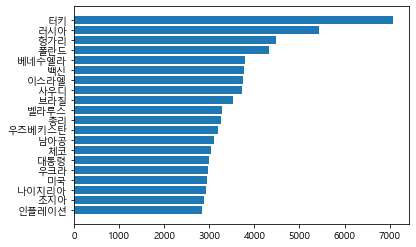

In [47]:
from matplotlib import font_manager, rc

# 그래프에서 사용할 한글 폰트를 지정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## 단어별 중요도(TF-IDF) 출력
# plt.barh로 그래프 출력
n = list(TF_IDF_new.keys())[:20][::-1] # 빈도수 상위 20개의 단어를 추출해 역순으로 정렬
w = list(TF_IDF_new.values())[:20][::-1] # 20개 단어에 대한 빈도

plt.barh(range(20),w,tick_label=n) # 수평 막대그래프
plt.show()

In [48]:
# 단어별 중요도를 담을 딕셔너리 생성
tokens_const1 = list(TF_IDF_new.keys())
tokens_const_count1 = list(TF_IDF_new.values())

i_count = map(int, tokens_const_count1)
tokens_const_count1 = list(i_count)

token_word_count1 = dict(zip(tokens_const1, tokens_const_count1))

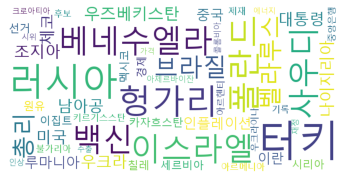

In [49]:
# WordCloud 객체에 전달할 폰트주소 생성
font_path = 'c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 100, # 최대 폰트 크기
    width = 800, # 이미지 너비
    height = 400, # 이미지 높이
    background_color='white', # 이미지 배경색
    max_words=50) # 최대 단어 수

# 원문이 아닌 형태소 분석 결과로부터 워드 클라우드 생성
wordcloud.generate_from_frequencies(token_word_count1)
wordcloud.to_file('Emerics.png') # 생성한 이미지를 파일로 저장
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

### 단어 분포 탐색

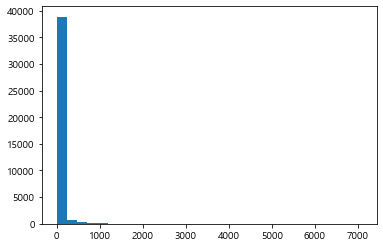

In [50]:
plt.hist(list(token_word_count1.values()), bins=30)
plt.show()